*ADS-A Week 6 Assignment*

# Who Survived the Titanic Disaster?

## 1. Introduction

In this titanic example we will use decision trees. The main advantage of this model is that humans can easily 
understand and reproduce the sequence of decisions taken to predict the target class of a new data point.

This is very important for tasks such as medical diagnosis or credit approval, where we want to show a reason for the 
decision, rather than just saying this is what the training data suggests (which is, by definition, what every supervised 
learning method does).

The problem we would like to solve is to determine if a Titanic's passenger would have survived, given age, passenger class, 
and sex. Why these features? 

Answer: Very specific features (name is an extreme case) could result in overfitting (consider a tree that just asks if the name is X, she survived). Features for which there are a small number of instances with each value present a similar problem. They might not be useful for generalization. We will use class, age, and sex because a priori, we expect them to have possibly influenced the passenger's survival.

Each instance in the dataset has the following form:

     "1","1st",1,"Allen, Miss Elisabeth Walton",29.0000,"Southampton","St Louis, MO","B-5","24160 L221","2","female"
     
Note that the raw data consists largely of strings. To apply machine learning algo's these strings have to be converted to numerical data first (at least the columns that are of interest)!

## 2. Prepare Dataset with Pandas 

Pandas is a Python module that works with the so-called dataframe concept (rows are observations, columns refer to the features). A dataframe is essentially a two-dimensional labeled data structure where
each column represent a feature and each row represents an observation.

More details, see: https://www.kaggle.com/c/titanic/details/getting-started-with-python-ii 

### 2.1. Load Dataset

Download the Titanic dataset (csv file) from Canvas, read it with Pandas into a dataframe. Show the first 5 rows.

In [40]:
import pandas as pd
import numpy as np

print('numpy version:', np.__version__)
print('matplotlib version:', pd.__version__)

## Your code ...
# when setting pandas options, the setting will be stored and kept no matter cell reruns, 
# so setting pandas option will only reset when done manually
# pd.reset_option('display.max_rows')
df_titanic = pd.read_csv("Titanic.csv")
df_titanic.columns =['passengers','pclass','survived','name','age','embarked','home/dest','room','ticket','boat','sex']
df_titanic.head(10)

numpy version: 1.20.3
matplotlib version: 1.3.4


,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
5,6,1st,1,"Anderson, Mr Harry",47.0000,Southampton,"New York, NY",E-12,NaN,3,male
6,7,1st,1,"Andrews, Miss Kornelia Theodosia",63.0000,Southampton,"Hudson, NY",D-7,13502 L77,10,female
7,8,1st,0,"Andrews, Mr Thomas, jr",39.0000,Southampton,"Belfast, NI",A-36,NaN,NaN,male
8,9,1st,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.0000,Southampton,"Bayside, Queens, NY",C-101,NaN,2,female
9,10,1st,0,"Artagaveytia, Mr Ramon",71.0000,Cherbourg,"Montevideo, Uruguay",NaN,NaN,-22,male


Also show the 10 last rows. What is the problem in the last couple of rows?


In [41]:
## Your code ...
# These records are missing a lot of data, this will make it hard to use, 
# because there is very little information to base a prediction on
df_titanic.tail(10)

,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex
1303,1304,3rd,0,"Yasbeck, Mr Antoni",NaN,NaN,NaN,NaN,NaN,NaN,male
1304,1305,3rd,1,"Yasbeck, Mrs Antoni",NaN,NaN,NaN,NaN,NaN,NaN,female
1305,1306,3rd,0,"Youssef, Mr Gerios",NaN,NaN,NaN,NaN,NaN,NaN,male
1306,1307,3rd,0,"Zabour, Miss Hileni",NaN,NaN,NaN,NaN,NaN,NaN,female
1307,1308,3rd,0,"Zabour, Miss Tamini",NaN,NaN,NaN,NaN,NaN,NaN,female
1308,1309,3rd,0,"Zakarian, Mr Artun",NaN,NaN,NaN,NaN,NaN,NaN,male
1309,1310,3rd,0,"Zakarian, Mr Maprieder",NaN,NaN,NaN,NaN,NaN,NaN,male
1310,1311,3rd,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male
1311,1312,3rd,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female
1312,1313,3rd,0,"Zimmerman, Leo",NaN,NaN,NaN,NaN,NaN,NaN,male


### 2.2. Investigate Dataset

How does Pandas interpret the data? The following 3 commands can be used to investigate the data. Describe in your own words what the command does.

In [42]:
df_titanic.dtypes

## Your answer ...
# Shows what datatype a column holds

passengers      int64
pclass         object
survived        int64
name           object
age           float64
embarked       object
home/dest      object
room           object
ticket         object
boat           object
sex            object
dtype: object

In [43]:
df_titanic.info()

## Your answer ...
# Shows both the datatype and how many rows of given data are a non-null value, indicating how much data is available

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   passengers  1313 non-null   int64  
 1   pclass      1313 non-null   object 
 2   survived    1313 non-null   int64  
 3   name        1313 non-null   object 
 4   age         633 non-null    float64
 5   embarked    821 non-null    object 
 6   home/dest   754 non-null    object 
 7   room        77 non-null     object 
 8   ticket      69 non-null     object 
 9   boat        347 non-null    object 
 10  sex         1313 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 113.0+ KB


In [44]:
df_titanic.describe()

## Your answer ...
# Shows statistical data for datatypes consisting of numbers for quick overview

,passengers,survived,age
count,1313.000000,1313.000000,633.000000
mean,657.000000,0.341965,31.194181
std,379.174762,0.474549,14.747525
min,1.000000,0.000000,0.166700
25%,329.000000,0.000000,21.000000
50%,657.000000,0.000000,30.000000
75%,985.000000,1.000000,41.000000
max,1313.000000,1.000000,71.000000


In [45]:
# Slice the first 10 rows of the 'age' column. 

## Your code ...
df_titanic.loc[5:20]
# Shows the selected columns, keep in mind that when given a too large range matplotlib will automatically cut is:
# df_titanic.loc[5:200] >>
# 5 <<
# 6
# ...
# 199
# 200

,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex
5,6,1st,1,"Anderson, Mr Harry",47.0,Southampton,"New York, NY",E-12,NaN,3,male
6,7,1st,1,"Andrews, Miss Kornelia Theodosia",63.0,Southampton,"Hudson, NY",D-7,13502 L77,10,female
7,8,1st,0,"Andrews, Mr Thomas, jr",39.0,Southampton,"Belfast, NI",A-36,NaN,NaN,male
8,9,1st,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.0,Southampton,"Bayside, Queens, NY",C-101,NaN,2,female
9,10,1st,0,"Artagaveytia, Mr Ramon",71.0,Cherbourg,"Montevideo, Uruguay",NaN,NaN,-22,male
10,11,1st,0,"Astor, Colonel John Jacob",47.0,Cherbourg,"New York, NY",NaN,17754 L224 10s 6d,-124,male
11,12,1st,1,"Astor, Mrs John Jacob (Madeleine Talmadge Force)",19.0,Cherbourg,"New York, NY",NaN,17754 L224 10s 6d,4,female
12,13,1st,1,"Aubert, Mrs Leontine Pauline",NaN,Cherbourg,"Paris, France",B-35,17477 L69 6s,9,female
13,14,1st,1,"Barkworth, Mr Algernon H.",NaN,Southampton,"Hessle, Yorks",A-23,NaN,B,male
14,15,1st,0,"Baumann, Mr John D.",NaN,Southampton,"New York, NY",NaN,NaN,NaN,male


In [46]:
# What kind of object is this 'age' column?   
type(df_titanic['age'])

# Note: Single column is neither an numpy array, nor a pandas dataframe but rather a pandas-specific object called 
# data Series.

pandas.core.series.Series

In [47]:
# What is the average age over all passengers?

## Your code ...
average = df_titanic['age'].mean()
print('avg:',average)
print('max', df_titanic['age'].max())
print('min', df_titanic['age'].min())
# Somebody brought a two month old baby on a cruise ship??

avg: 31.19418104265403
max 71.0
min 0.1667


In [48]:
# The next thing we'd like to do is look at more specific subsets of the dataframe. Slice the columns 'sex', 'pclass', 
# and 'age'.

## Your code ...
df_titanic[['sex','pclass','age']].head(10)

,sex,pclass,age
0,female,1st,29.0000
1,female,1st,2.0000
2,male,1st,30.0000
3,female,1st,25.0000
4,male,1st,0.9167
5,male,1st,47.0000
6,female,1st,63.0000
7,male,1st,39.0000
8,female,1st,58.0000
9,male,1st,71.0000


In [49]:
# First look at all of the missing 'age' values, because we will need to address them in our model if we hope to use 
# all the data for more advanced algorithms. To filter for missing values you can use:
df_titanic[df_titanic['age'].isnull()][['sex', 'pclass', 'age']]
# ^Dataframe   ^Conditional filter    ^ ^Columns filter
#                                     ^This obj[][] syntax proves that I still do not get python logic

# Here the only thing we did was print all (680) cases, but the same syntax can be used later if we take action on them.

,sex,pclass,age
12,female,1st,NaN
13,male,1st,NaN
14,male,1st,NaN
29,male,1st,NaN
32,male,1st,NaN
...,...,...,...
1308,male,3rd,NaN
1309,male,3rd,NaN
1310,male,3rd,NaN
1311,female,3rd,NaN


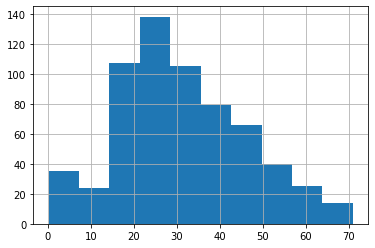

In [50]:
# Before we finish the initial investigation, let's use one other convenience function of pandas to derive a 
# histogram of any numerical column. 
import pylab as pyl
df_titanic['age'].hist()
pyl.show()
# Don't see why you need the pylab implementation of matplotlib here when you can just use matplotlib natively

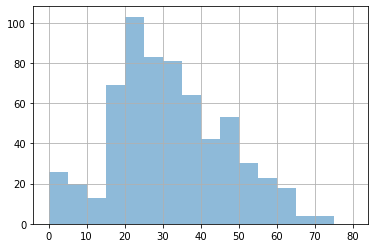

In [51]:
# Inside the parentheses of .hist(), you can also be more explicit about options of this function. Before you invoke 
# it, you can also be explicit that you are dropping the missing values of age:
df_titanic['age'].dropna().hist(bins=16,             range=(0,80), alpha = .5)
#                               ^Grouping division   ^Xaxis range  ^Transparency
pyl.show()

## 3. Data Munging

### 3.1. Transform the Data 

Transform the values in the dataframe into the shape we need for machine learning. 

First of all, it's hard to run analysis on the string values of "male" and "female". 
Let's store this transformation into a new column 'Gender'. We have a precedent of analyzing the women first, so let's decide female = 0 and male = 1.  

In [52]:
# Let's store our transformation in a new column, so the original sex isn't changed.
df_titanic['Gender'] = 4
df_titanic['Gender'] = df_titanic['sex'].map( {'female': 0, 'male': 1} ).astype(int)
# Could also make it type bool. 
# However I do see the problem with current day genders not being binary, but for this dataset should be fine
df_titanic.head(3)

,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex,Gender
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female,0
1,2,1st,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male,1


In [53]:
# Do the same for passenger class, make it numeric, in a new column PClass. 

## Your code ...
df_titanic['PClass'] = np.nan
# Feel giving default value 5 is slightly arbitrary,
# Would prefer setting value to NaN to avoid confusion
# eg. np.nan
df_titanic['PClass'] = df_titanic['pclass'].map( {'1st' : 1, '2nd' : 2, '3rd' : 3} ).astype(int)
df_titanic.head(3)

,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex,Gender,PClass
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female,0,1
1,2,1st,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0,1
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male,1,1


In [54]:
# Show all males in the second class

## Your code ...
print('max rows shown:', pd.options.display.max_rows)
pd.set_option('display.max_rows', None)
df_titanic[(df_titanic['Gender'] == 1) & (df_titanic['PClass'] == 2)]

max rows shown: 60


,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex,Gender,PClass
322,323,2nd,0,"Abelson, Mr Samuel",30.0000,Cherbourg,"Russia New York, NY",NaN,NaN,NaN,male,1,2
324,325,2nd,0,"Andrew, Mr Edgar Samuel",18.0000,Southampton,"Buenos Aires, Argentina / New Jersey, NJ",NaN,NaN,NaN,male,1,2
325,326,2nd,0,"Andrew, Mr Frank",NaN,Southampton,"Cornwall, England Houghton, MI",NaN,NaN,NaN,male,1,2
326,327,2nd,0,"Angle, Mr William A.",34.0000,Southampton,"Warwick, England",NaN,NaN,NaN,male,1,2
328,329,2nd,0,"Ashby, Mr John",57.0000,Southampton,"West Hoboken, NJ",NaN,NaN,NaN,male,1,2
329,330,2nd,0,"Bailey, Mr Percy Andrew",18.0000,Southampton,"Penzance, Cornwall / Akron, OH",NaN,NaN,NaN,male,1,2
330,331,2nd,0,"Baimbrigge, Mr Charles R.",23.0000,Southampton,Guernsey,NaN,NaN,NaN,male,1,2
332,333,2nd,0,"Banfield, Mr Frederick J.",28.0000,Southampton,"Plymouth, Dorset / Houghton, MI",NaN,NaN,NaN,male,1,2
333,334,2nd,0,"Bateman, Rev Robert James",51.0000,Southampton,"Jacksonville, FL",NaN,NaN,-174,male,1,2
334,335,2nd,1,"Beane, Mr Edward",32.0000,Southampton,"Norwich / New York, NY",NaN,NaN,NaN,male,1,2


### 3.2. Deal with Missing Values

Now it's time to deal with the missing values of age! Why? Simply because most machine learning will need a complete set of 
values in that column to use it. By filling it in with guesses, we'll be introducing some noise into a model, but if we can 
keep our guesses reasonable, some of them should be close to the historical truth (whatever it was...), and the overall 
predictive power of age might still make a better model than before. 

We know the average age of all passengers (with valid age field) is 31.2 - we could fill in the null values with that mean value. But may be the median would be better? (to reduce the influence of a few rare 70- and 80-year olds?) The age histogram did seem positively skewed. These are the kind of decisions you make as you create your models.

Replace the NaN (unknown) age values with a reasonable estimate. Do this in a new column 'AgeFill'

In [55]:
pd.reset_option('display.max_rows')
average_age = df_titanic['age'].mean()
average_age

df_titanic['AgeFill'] = 6
df_titanic['AgeFill'] = df_titanic['age'].fillna(average_age)
df_titanic.tail(10)


,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex,Gender,PClass,AgeFill
1303,1304,3rd,0,"Yasbeck, Mr Antoni",NaN,NaN,NaN,NaN,NaN,NaN,male,1,3,31.194181
1304,1305,3rd,1,"Yasbeck, Mrs Antoni",NaN,NaN,NaN,NaN,NaN,NaN,female,0,3,31.194181
1305,1306,3rd,0,"Youssef, Mr Gerios",NaN,NaN,NaN,NaN,NaN,NaN,male,1,3,31.194181
1306,1307,3rd,0,"Zabour, Miss Hileni",NaN,NaN,NaN,NaN,NaN,NaN,female,0,3,31.194181
1307,1308,3rd,0,"Zabour, Miss Tamini",NaN,NaN,NaN,NaN,NaN,NaN,female,0,3,31.194181
1308,1309,3rd,0,"Zakarian, Mr Artun",NaN,NaN,NaN,NaN,NaN,NaN,male,1,3,31.194181
1309,1310,3rd,0,"Zakarian, Mr Maprieder",NaN,NaN,NaN,NaN,NaN,NaN,male,1,3,31.194181
1310,1311,3rd,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male,1,3,31.194181
1311,1312,3rd,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female,0,3,31.194181
1312,1313,3rd,0,"Zimmerman, Leo",NaN,NaN,NaN,NaN,NaN,NaN,male,1,3,31.194181


#### Now it is your turn. Use the mean age of male and female for each passenger class

In [56]:
average_age = df_titanic['age'].mean()
average_age

df_titanic['AgeFill'] = np.nan
# Single line setting mean based on a column's uniques, returns a mask
print('mean ages gender based:', df_titanic.groupby("Gender")["age"].transform("mean").unique())
print('mean ages class based:', df_titanic.groupby("PClass")["age"].transform("mean").unique())
# Another way to just get a touple with all options
# df_titanic.groupby('Gender').mean().age

avgAge = (df_titanic.groupby("Gender")["age"].transform("mean") + df_titanic.groupby("PClass")["age"].transform("mean"))/2
print('mean ages combined:', avgAge.unique())
df_titanic['AgeFill'] = df_titanic["age"].fillna(avgAge)

# Could probably also get away with numpy where()
# df_titanic['AgeFill'] = np.where(df_titanic['sex'] == 0, df_titanic[df_titanic['sex'] == 0].mean() , df_titanic[df_titanic['sex'] == 1].mean())
df_titanic[403:850]

mean ages gender based: [30.57270247 31.58141   ]
mean ages class based: [39.66777301 28.30031415 24.51965795]
mean ages combined: [35.12023774 35.6245915  29.94086208 29.43650831 28.05053397 27.54618021]


,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex,Gender,PClass,AgeFill
403,404,2nd,0,"Faunthorpe, Mr Harry",NaN,Southampton,"England / Philadelphia, PA",NaN,NaN,-286,male,1,2,29.940862
404,405,2nd,1,"Faunthorpe, Mrs Lizzie (see Wilkinson, E.)",NaN,NaN,NaN,NaN,NaN,NaN,female,0,2,29.436508
405,406,2nd,0,"Fillbrook, Mr Charles",NaN,Southampton,"Cornwall / Houghton, MI",NaN,NaN,NaN,male,1,2,29.940862
406,407,2nd,0,"Fox, Mr Stanley H.",38.0,Southampton,"Rochester, NY",NaN,229236 L13,-236,male,1,2,38.000000
407,408,2nd,0,"Frost, Mr Anthony (Archie) W.",NaN,NaN,Belfast,NaN,NaN,NaN,male,1,2,29.940862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,846,3rd,0,"Hampe, Mr Leon",NaN,NaN,NaN,NaN,NaN,NaN,male,1,3,28.050534
846,847,3rd,0,"Hansen, Mr Claus Peter",NaN,NaN,NaN,NaN,NaN,NaN,male,1,3,28.050534
847,848,3rd,1,"Hansen, Mrs Claus Peter",NaN,NaN,NaN,NaN,NaN,NaN,female,0,3,27.546180
848,849,3rd,0,"Hansen, Mr Henrik Juul",NaN,NaN,NaN,NaN,NaN,NaN,male,1,3,28.050534


### 3.3 Hot Encoding

We have a categorical feature attribute: pclass. We already converted its three classes into 0, 1, and 2. This transformation implicitly introduces an ordering. 

As a final step, we will try a more general approach that does not assume an ordering. This is widely used to convert categorical classes into real-valued attributes. We will introduce an additional encoder and convert the class attributes into three new binary features, each of them indicating if the instance belongs to a feature value (1) or (0). This is called one hot encoding, and it is a very common way of managing categorical attributes for real-based methods.

In [57]:
df_titanic['FirstClass'] = df_titanic['pclass'].map( {'1st': 1, '2nd': 0, '3rd': 0} ).astype(int)
df_titanic['SecondClass'] = df_titanic['pclass'].map( {'1st': 0, '2nd': 1, '3rd': 0} ).astype(int)
df_titanic['ThirdClass'] = df_titanic['pclass'].map( {'1st': 0, '2nd': 0, '3rd': 1} ).astype(int)
# Here i see no reason not to make the columns boolean datatypes
df_titanic.head(5)

,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex,Gender,PClass,AgeFill,FirstClass,SecondClass,ThirdClass
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,0,1,29.0000,1,0,0
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0,1,2.0000,1,0,0
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male,1,1,30.0000,1,0,0
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0,1,25.0000,1,0,0
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,1,1,0.9167,1,0,0


## 4. Preprocessing

Let's start with feature selection

In [58]:
titanic_X = df_titanic[['AgeFill','Gender','FirstClass','SecondClass','ThirdClass']]
titanic_y = df_titanic['survived']

In [59]:
titanic_X.head(10)

,AgeFill,Gender,FirstClass,SecondClass,ThirdClass
0,29.0000,0,1,0,0
1,2.0000,0,1,0,0
2,30.0000,1,1,0,0
3,25.0000,0,1,0,0
4,0.9167,1,1,0,0
5,47.0000,1,1,0,0
6,63.0000,0,1,0,0
7,39.0000,1,1,0,0
8,58.0000,0,1,0,0
9,71.0000,1,1,0,0


In [60]:
titanic_y.head(10)

0    1
1    0
2    0
3    0
4    1
5    1
6    1
7    0
8    1
9    0
Name: survived, dtype: int64

Now split the data into train and test

In [61]:
from sklearn.model_selection import train_test_split

X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(titanic_X, titanic_y, test_size=0.2, random_state = 42)

## 5. Modeling

The preprocessing step is usually under-estimated in machine learning methods, but as we can see even in this very simple example, it can take some time to make data look as our methods expect. It is also very important in the overall machine learning process; if we fail in this step (for example, incorrectly encoding attributes, or selecting the wrong features), the following steps will fail, no matter how good the method we use for learning!!

We are now ready for the implementation of decision trees in scikit-learn, as this algo expects as input a list of 
real-valued features, and the decision rules of the model would be of the form: Feature < value. 
For example, AgeFill < 20.0.

Standardization (normalization) is not an issue for decision trees because the relative magnitude of features does not 
affect the classifier performance; so scaling is not needed.

### 5.1. Training a Decision Tree Classifier

 Now, we can create a new DecisionTreeClassifier and use the fit method of the classifier to do the learning job. 
 Parameter settings: use the entropy citerion and try out different settings for the depth of the tree and the 
 minimum samples required for a node in the tree graph

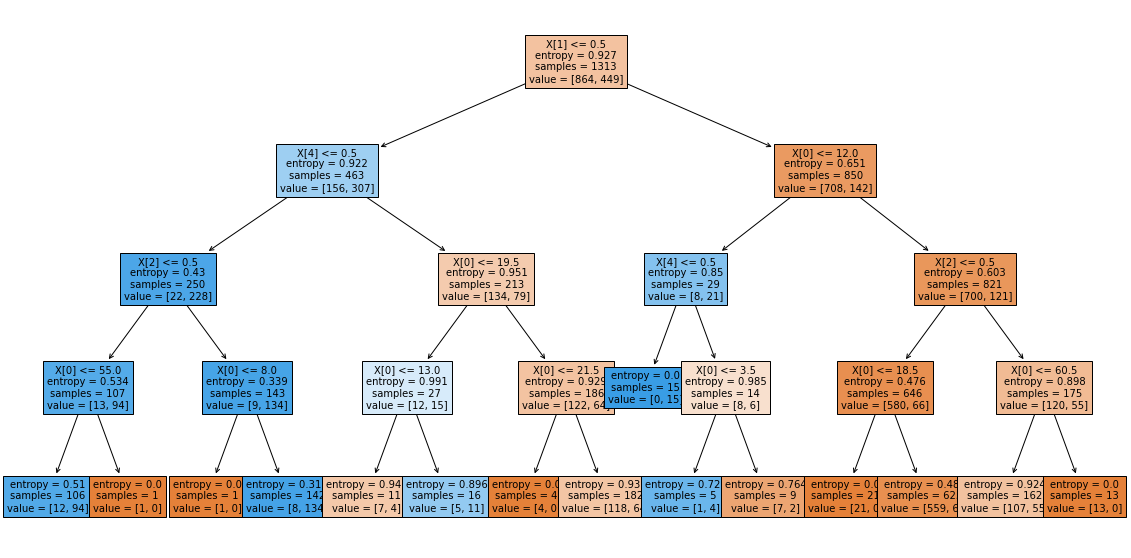

In [62]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=2, random_state = 42)
# Originally the fitting was done with the base X and Y values and not the split values, I believe i understand why this does not matter,  
# but i am still slightly sceptical
tree_clf.fit(titanic_X,titanic_y)
# tree_clf.fit(X_train_titanic, y_train_titanic)

plt.figure(figsize=(20, 10))
tree.plot_tree(tree_clf, filled=True, fontsize=10)
plt.show()

[entropy explanation](https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8)  
[explantation based on the sklearn criterion](https://quantdare.com/decision-trees-gini-vs-entropy/)   
  
Gini works by checking the purity, meaning checking if an entry is mislabeled or not, and using this to decide a good predictor.  
Entropy on the otherhand works based on disorder.  
both of these work based on getting the lowest value out of the two formulas and using this for the tree branch split.  
Main visible differences based on the formulas are that gini has a smaller interval and entropy being more computationally intensive.

# Gini decision tree
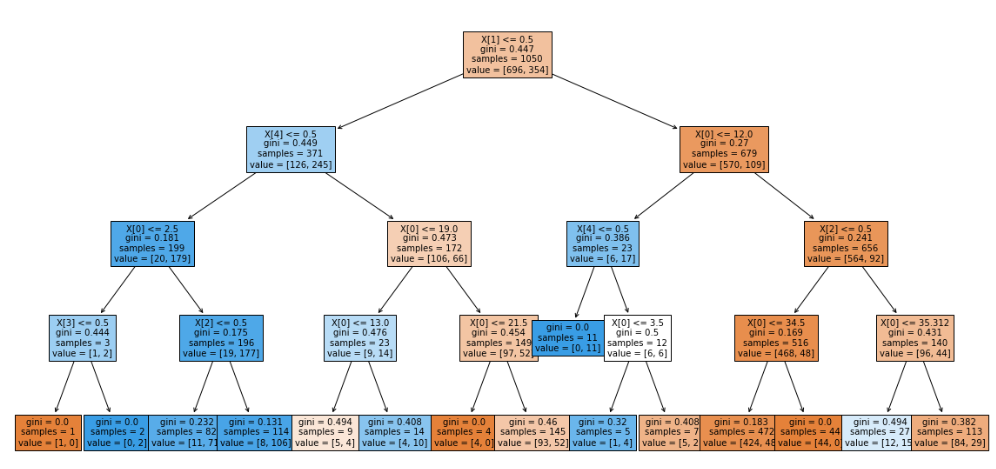

### 5.2. Evaluation Metrics Function

In [63]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test_titanic)
accuracy_score(y_test_titanic, y_pred)

0.8326996197718631

### 5.3. Keep age as the only feature and run decision tree classification again. Compare the evaluation

In [64]:
titanic_X_Age = df_titanic[['AgeFill']]

X_train_Age_titanic, X_test_Age_titanic, y_train_Age_titanic, y_test_Age_titanic = train_test_split(titanic_X_Age, titanic_y, test_size=0.2, random_state = 42)

tree_clf_age = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=2, random_state = 42)
tree_clf_age.fit(titanic_X_Age, titanic_y)

y_pred_age = tree_clf_age.predict(X_test_Age_titanic)
print(accuracy_score(y_test_Age_titanic, y_pred_age))

0.6996197718631179


As expected basing the prediction on only one feature dramatically lowered the accuracy

### 5.4. Add embarked as the new feature with one hot encoding. Run the decision tree classification again. Compare the evaluation. Do you believe the model has been improved? Why?

In [65]:
print(df_titanic['embarked'].unique())

# using .map's na_action paramater does not allow you to give custom values such as na_action=0, 
# so i have to set all NaN afterwards to 0
df_titanic['embarkedSouthhampton'] = df_titanic['embarked'].map( {'Southampton': 1, 'Cherbourg': 0, 'Queenstown': 0})
df_titanic['embarkedCherbourg'] = df_titanic['embarked'].map( {'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 0})
df_titanic['embarkedQueenstown'] = df_titanic['embarked'].map( {'Southampton': 0, 'Cherbourg': 0, 'Queenstown': 1})
df_titanic[['embarkedSouthhampton', 'embarkedCherbourg', 'embarkedQueenstown']] = df_titanic[['embarkedSouthhampton', 'embarkedCherbourg', 'embarkedQueenstown']].fillna(0).astype(int)

titanic_X_Embarked = df_titanic[['AgeFill', 'embarkedSouthhampton', 'embarkedCherbourg', 'embarkedQueenstown']]

X_train_Embarked_titanic, X_test_Embarked_titanic, y_train_Embarked_titanic, y_test_Embarked_titanic = train_test_split(titanic_X_Embarked, titanic_y, test_size=0.2, random_state = 42)

tree_clf_embarked = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=2, random_state = 42)
tree_clf_embarked.fit(titanic_X_Embarked, titanic_y)

y_pred_embarked = tree_clf_embarked.predict(X_test_Embarked_titanic)
print(accuracy_score(y_test_Embarked_titanic, y_pred_embarked))

['Southampton' 'Cherbourg' nan 'Queenstown']
0.6730038022813688


During my testing i noticed that depending on the data given (affected by the splitting behavior), the accuracy would actually go up, which is very surprising because the embarking location should not define the chance of survival seen as the titanic obviously crashed after these places.  
And ofcourse the fact that there is a lot of missing data from the embarked should also negatively impact the usefullness of this feature.

In [66]:
print('missing embarked', df_titanic['embarked'].isna().sum(), '/', len(df_titanic.index))

missing embarked 492 / 1313


In [67]:
SouthhamptonCount = len(df_titanic[df_titanic['embarkedSouthhampton'] == 1].index)
CherbourgCount = len(df_titanic[df_titanic['embarkedCherbourg'] == 1].index)
QueenstownCount = len(df_titanic[df_titanic['embarkedQueenstown'] == 1].index)

print('firstclass Southhampton', len(df_titanic[(df_titanic['embarkedSouthhampton'] == 1) & (df_titanic['PClass'] == 1)].index), '/', SouthhamptonCount)
print('firstclass Cherbourg', len(df_titanic[(df_titanic['embarkedCherbourg'] == 1) & (df_titanic['PClass'] == 1)].index), '/', CherbourgCount)
print('firstclass Queenstown', len(df_titanic[(df_titanic['embarkedQueenstown'] == 1) & (df_titanic['PClass'] == 1)].index), '/', QueenstownCount)

print('\nsurvived Southhampton', len(df_titanic[(df_titanic['embarkedSouthhampton'] == 1) & (df_titanic['survived'] == 1)].index), '/', SouthhamptonCount)
print('survived Cherbourg', len(df_titanic[(df_titanic['embarkedCherbourg'] == 1) & (df_titanic['survived'] == 1)].index), '/', CherbourgCount)
print('survived Queenstown', len(df_titanic[(df_titanic['embarkedQueenstown'] == 1) & (df_titanic['survived'] == 1)].index), '/', QueenstownCount)

firstclass Southhampton 167 / 573
firstclass Cherbourg 142 / 203
firstclass Queenstown 3 / 45

survived Southhampton 229 / 573
survived Cherbourg 119 / 203
survived Queenstown 14 / 45


After further inspection I see that people in Cherbourg have a much higher % of firstclass, this could be a reason why the embarked location has an positive impact, if you embarked in Cherbourg you have a high chance of being firstclass and thus a higher chance of surviving.

Using the data splitting provided originally however, I do see a decline in accuracy which was to be expected for the reasons stated previously.

## 6. Introducing Random Forest

A common criticism to decision trees is that once the training set is divided after
answering a question, it is not possible to *reconsider this decision*. For example, if
we divide men and women, every subsequent question would be only about men or
women, and the method could not consider another type of question (say, age less
than a year, irrespective of the gender). Random Forests try to introduce some level
of randomization in each step, proposing alternative trees and combining them to
get the final prediction. These types of algorithms that consider several classifiers
answering the same question are called **ensemble methods**. In the Titanic task, it is
probably hard to see this problem because we have very few features, but usually
a case has in the order of thousand(s) features.

Random Forests propose to build several decision trees, each one based on a subset of the training
instances (selected randomly), and using a small random number of features. 
This produces multiple classifiers (multiple decision trees). 
At prediction time, each grown tree, given an instance, predicts its target class exactly as decision trees do. 
The class that most of the trees vote (that is the class most predicted by the trees) is the one suggested by the ensemble classifier.

## 7. Implement Random Forest

Implement a Random Forest classifier. Can you improve to above accuracy? Look at the sklearn documentation. Play with the parameters of the ``RandomForestClassifier``. Especially the parameter ``n_estimators`` (the number of trees in the forest) is of interest.

In [68]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_split=2, random_state = 42, n_estimators = 20)
forest_clf.fit(titanic_X, titanic_y)
y_pred = forest_clf.predict(X_test_titanic)
accuracy_score(y_test_titanic, y_pred)

0.8174904942965779

n_estimators = 4
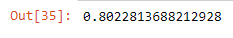
n_estimators = 5
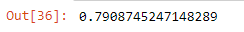
n_estimators = 20
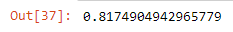
n_estimators = 2000
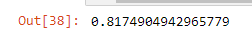

From experimenting with the n_estimators i found that it is not as simple as throwing more computing power at it will increase the accuracy.  
Firstly the most obvious, at some point the accuracy does not increase in any meaningfull way this makes me believe that a very optimal decision tree has been created given the available data and very little changes will cause this to change.  
  
On the other hand, when there are very little estimators, the trees generated will have a much bigger impact on the final result, as seen with 4 and 5, there is a chance that one of these trees causes the overall accuracy to decrease by random chance.

What is more surprsing is that the accuracy is still lower than the original decision tree, while using the same features.   
This is touched upon [here](https://stats.stackexchange.com/questions/241062/why-decision-tree-is-outperforming-random-forest-in-this-simple-case) in a stackoverflow question about this exact topic.